# Inaugural Project

Imports and set magics:

In [1]:
# import numpy
import numpy as np

# import matplotlib to plot the results
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel_ALversion
from HouseholdSpecializationModel_ALversion import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# Question 1

We consider a household with a male and female member, who jointly maximize their utility by allocating time to either home production or the labor market. They receive the wage wf and wm for male and female respectively for work dedicated to the labor market. The household gets utility from both consuming market goods, and consumption of home production. The household gets disutility from any type of work. The utility is maximized with respect to the contributed time to either the labor market or home production by the male and female member.

The maximization problem is solved discretely with increments of 0.5 hours. The model is solved by using the solver HouseHoldSpecializationModel_ALversion.py line 73 called solve_discrete. 


In [ ]:
# import matplotlib to plot the results
import matplotlib.pyplot as plt

# Values of alpha and sigma to consider
alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# Solve model for each sigma value
for sigma in sigma_values:
    model.par.sigma = sigma

    # Solve for each alpha value
    HF_HM_ratios = []
    for alpha in alpha_values:
        model.par.alpha = alpha
        opt = model.solve_discrete()
        HF_HM_ratio = opt.HF/opt.HM
        HF_HM_ratios.append(HF_HM_ratio)

    # Plot the HF/HM ratios as a function of alpha
    plt.plot(alpha_values, HF_HM_ratios, '-o')
    plt.xlabel('alpha')
    plt.ylabel('HF/HM ratio')
    plt.title('Variation of HF/HM with alpha (sigma='+str(sigma)+")")
    plt.show()

[1 4 9]


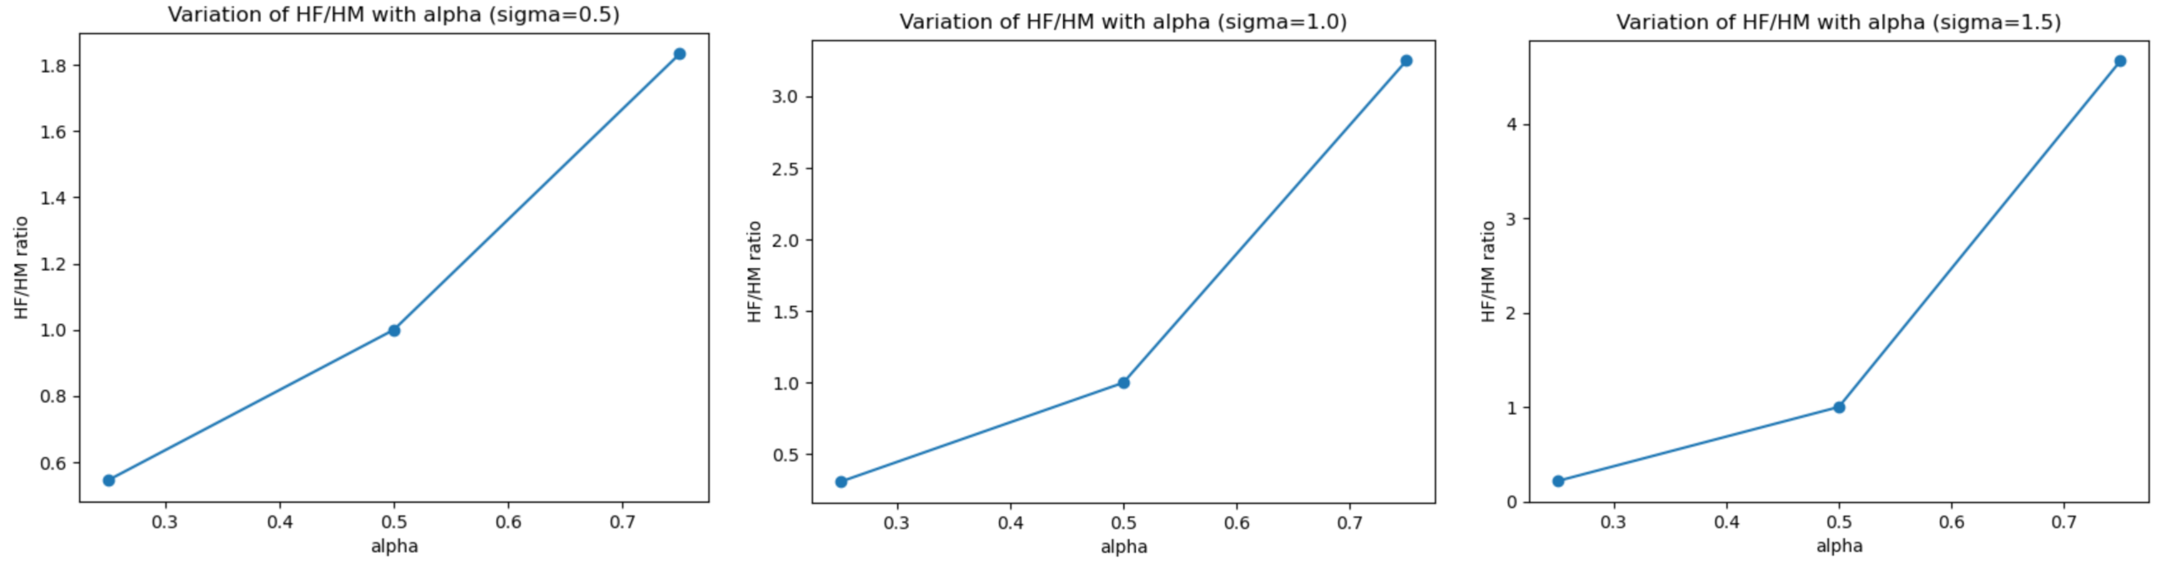

The three figures above show how the ratio of male and female time use in home production changes, when the parameter for female productivity in home production changes and the elasticity of substitution changes. 
With productivity, alpha=0.5, males and females will work the same number of hours in the home production because the wage rate in the labor market is the same and equally to one. If females are more productive compared to males (i.e. alpha>0.5), it would be optimal for females to work more in the home production. With alpha<0.5 it would be optimal for males to work more in the home production. 


# Question 2

We investigate how the log(Hf/Hm) changes when changing the labor wage ratio, log(wf/wm). We use the same discrete solver. 

In [3]:
# Values of wf to consider
wf_values = [0.8, 0.9, 1.0, 1.1, 1.2]

# Solve for each wf value
log_HF_HM_ratios = []
log_wf_wm_ratios = []
for wf in wf_values:
    model.par.wF = wf
    opt = model.solve_discrete()
    log_HF_HM_ratio = np.log(opt.HF/opt.HM)
    log_wf_wm_ratio = np.log(model.par.wF/model.par.wM)
    log_HF_HM_ratios.append(log_HF_HM_ratio)
    log_wf_wm_ratios.append(log_wf_wm_ratio)

# Plot the HF/HM ratios as a function of alpha
plt.plot(log_wf_wm_ratios, log_HF_HM_ratios, '-o')
plt.xlabel('log(wf/wm)')
plt.ylabel('log(HF/HM)')
plt.title('log(wf/wm) against log(HF/HM) with changing wf values')
plt.show()

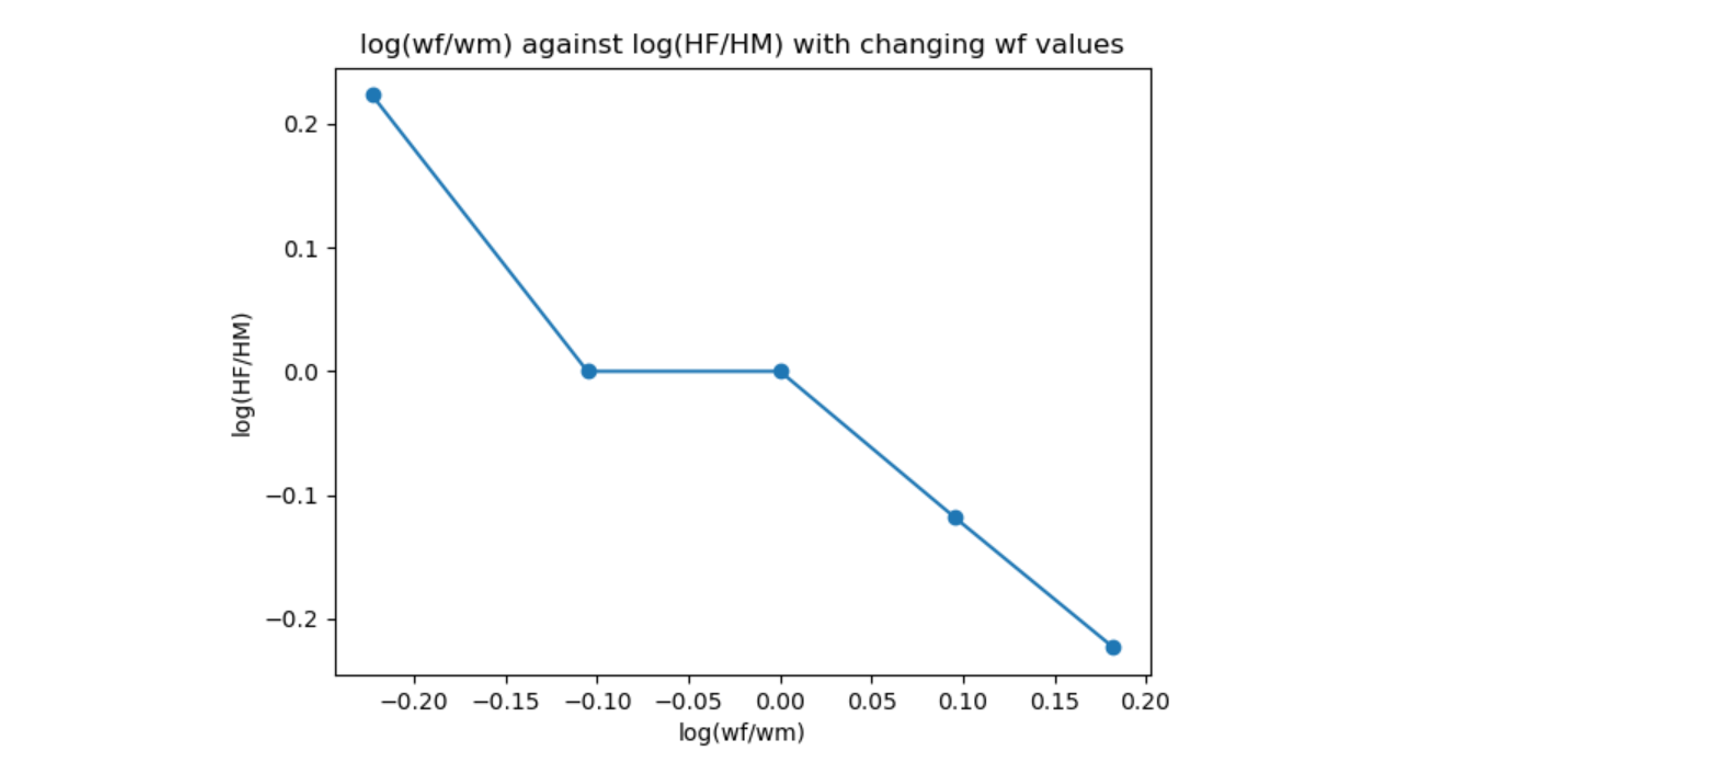

We see that a higher wage for females makes the devotion to home production more costly, hence the optimal time use in home production for females are negatively correlated with the relative labor wage. 

# Question 3

We change the solver, so the time devotion variables will now be continuous. This new solver is defined in the file HouseHoldSpecializationModel_ALversion.py. 

In [4]:
# Values of wf to consider
wf_values = [0.8, 0.9, 1.0, 1.1, 1.2]

# Solve for each wf value
log_HF_HM_ratios = []
log_wf_wm_ratios = []
for wf in wf_values:
    model.par.wF = wf
    opt = model.solve()
    log_HF_HM_ratio = np.log(opt.HF/opt.HM)
    log_wf_wm_ratio = np.log(model.par.wF/model.par.wM)
    log_HF_HM_ratios.append(log_HF_HM_ratio)
    log_wf_wm_ratios.append(log_wf_wm_ratio)

# Plot the HF/HM ratios as a function of alpha
plt.plot(log_wf_wm_ratios, log_HF_HM_ratios, '-o')
plt.xlabel('log(wf/wm)')
plt.ylabel('log(HF/HM)')
plt.title('log(wf/wm) against log(HF/HM) with changing wf values')
plt.show()

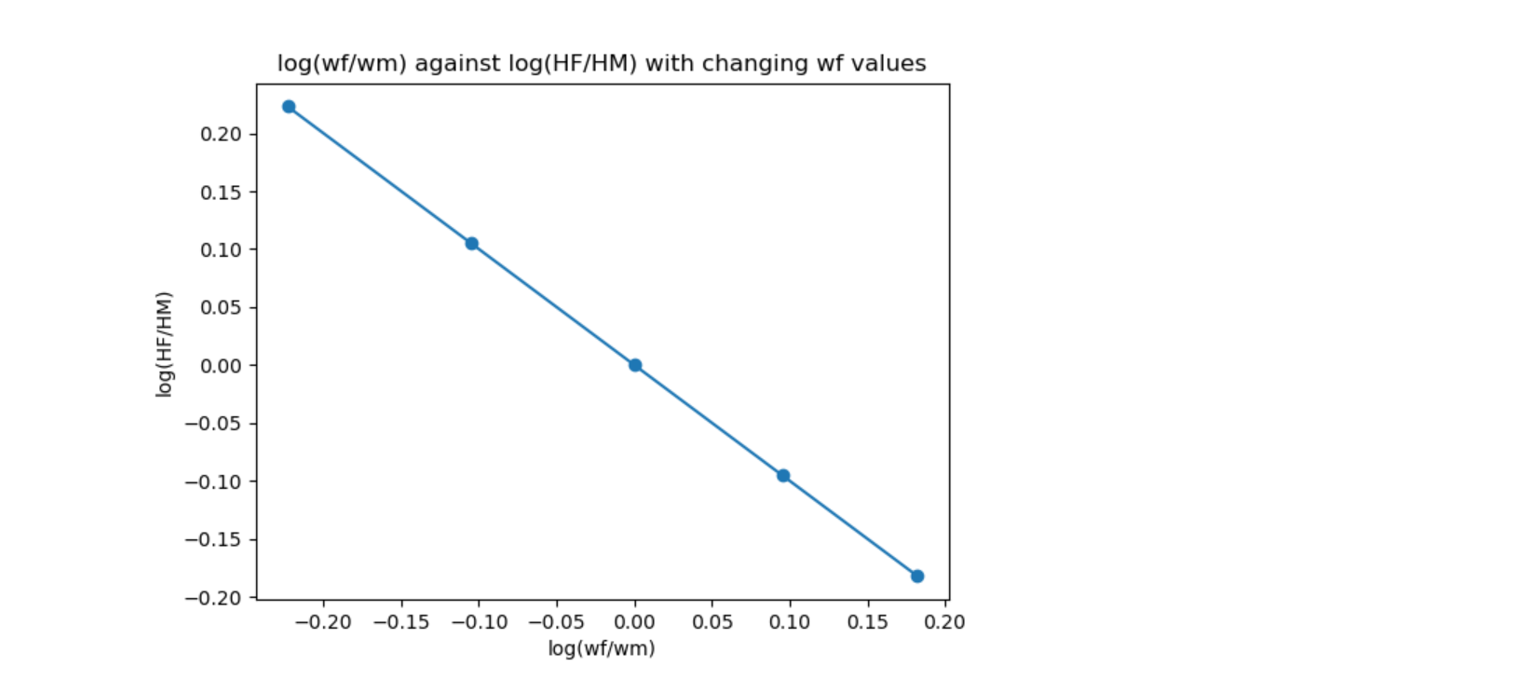

As the variables are now continuous the relationship between the relative wage ratio and relative participation ratio of home production is described by a linear slope. As indicated in the previous question, the optimal participation of females in home production are once again negatively correlated with a higher labor wage for females. 

# Question 4

We want to choose alpha and sigma to minimize 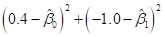 To do so, we run the regression used by Siminski and Yetsenga (2022) and estimate  and  for a range of female wages. We create a solver (seen in HouseHoldSpecializationModel_ALversion.py) that solves for the vector of female wages (called solve_wF_vec). The we solve the minimization problem, using the input from solve_wF_vec. 

In [ ]:
# Find alpha and sigma values that minimize the objective function
model.estimate()
print(f'Estimation results: alpha = {model.par.alpha:.2f}, sigma = {model.par.sigma:.2f}')

# Set empty vector to store results
pointestimates_model = np.empty(5)

# Estimate the model using S&Y's beta values, and store the estimates in the vector created above
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    pointestimates_model[i] = model.sol.beta0 + model.sol.beta1*np.log(wF/model.par.wM)

# Plot the estimate to illustrate how the model fits the data
plt.plot(np.log(model.par.wF_vec), pointestimates_model, '-o')
plt.xlabel('log(wf/wm)')
plt.ylabel('log(HF/HM)')
plt.title('Siminski and Yetsenga model')
plt.show()

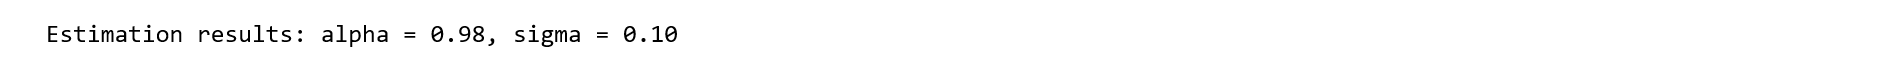

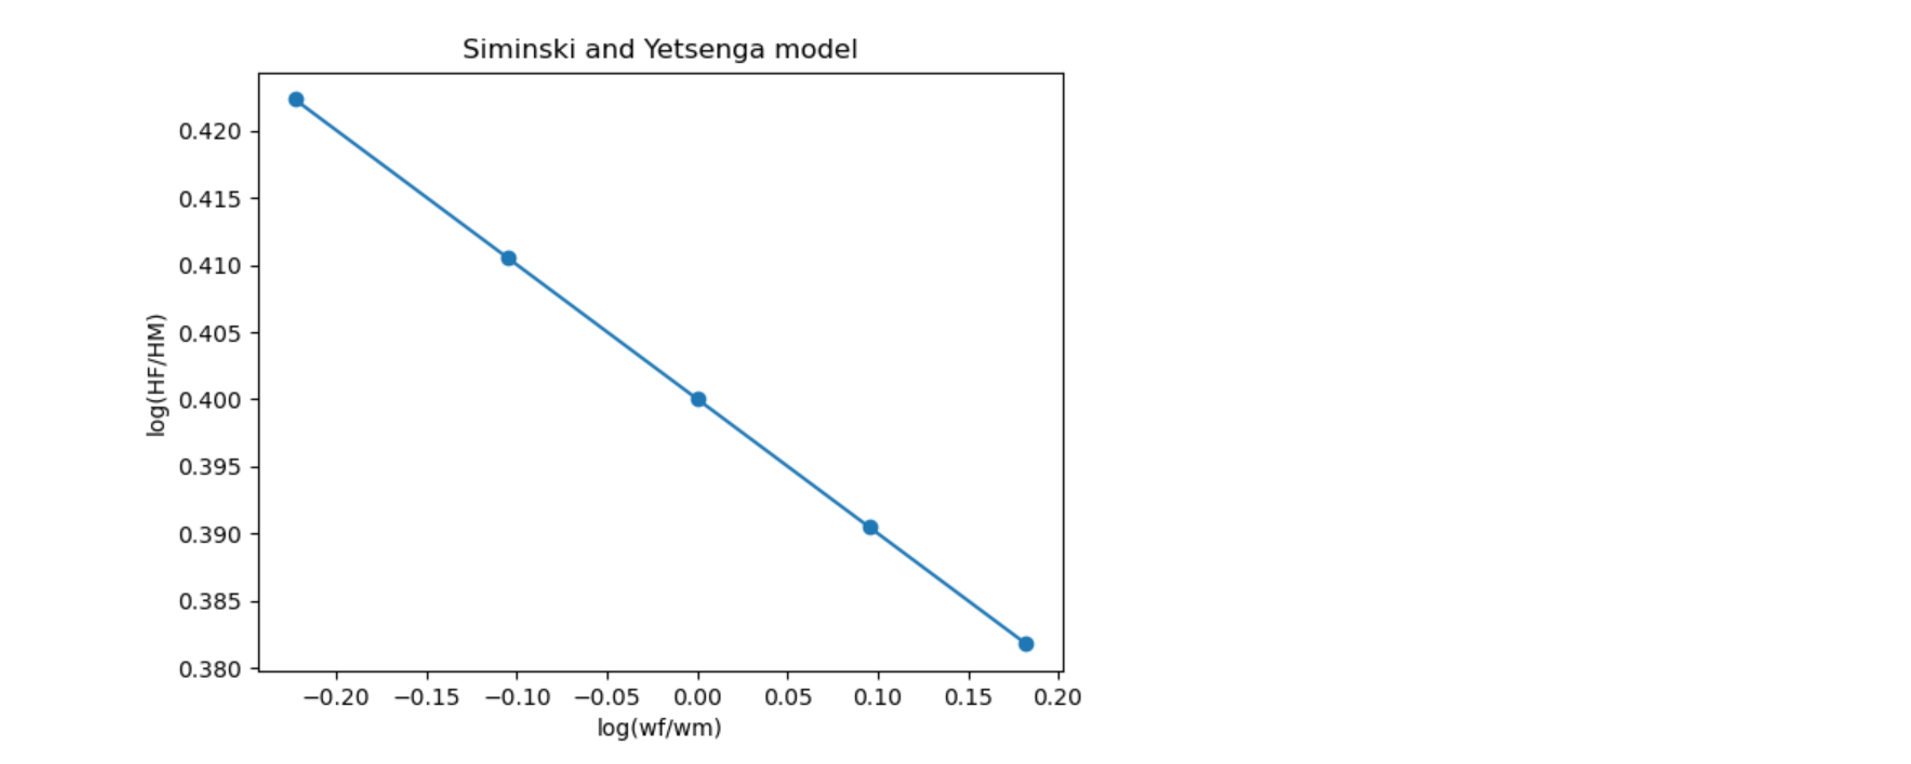

We get that alpha=0.982 and sigma=0.1. Further, there is no deviation from the results of Siminski and Yetsenga (2022). The results implies that females are much more productive in the home production compared to males. 
Given the alpha value close to one it represents a case where males are almost useless in the home production. This result seems unrealistic.  

# Question 5

For question 5 we create a new solver function in HouseHoldSpecializationModel_ALversion.py called estimate_alternative. This is essentially a copy of the solver function fra question 4, but with alpha fixed at 0.5.

To run the alternative solver, we implement the code below.

In [ ]:
# Find alpha and sigma values that minimize the objective function
model.estimate_alternative()
print(f'Estimation results: beta0 = {model.sol.beta0:.2f}, beta1 = {model.sol.beta1:.2f}, alpha = {model.par.alpha:.2f}, sigma = {model.par.sigma:.2f}')

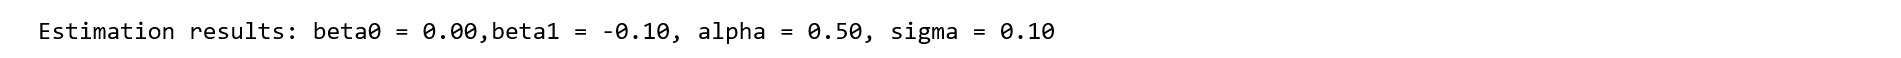